In [2]:
import lmfit
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
# rc('text', usetex=True)
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['font.size']=15
plt.rcParams['pdf.fonttype']=42
plt.rcParams["text.usetex"]=False

Index([u'concentration', u'pre-rRNA level', u'Area'], dtype='object')
0    0.136586
1    0.326515
2    0.377472
3    1.000000
Name: pre-rRNA level, dtype: float64
{'chi': 570.2345614332421, 'k_p': 4.68453465220053}
{'a': 0.18989435996288054}
0.0034573369022329516
0.002749759409271053
Index([u'concentration', u'pre-rRNA level', u'Area'], dtype='object')
0    0.175498
1    0.256367
2    0.364720
3    1.000000
Name: pre-rRNA level, dtype: float64
{'chi': 2499.4541245951677, 'k_p': 16.022130902310984}
{'a': 0.1748558426323818}
0.0007048455723519038
0.0036295895706176195


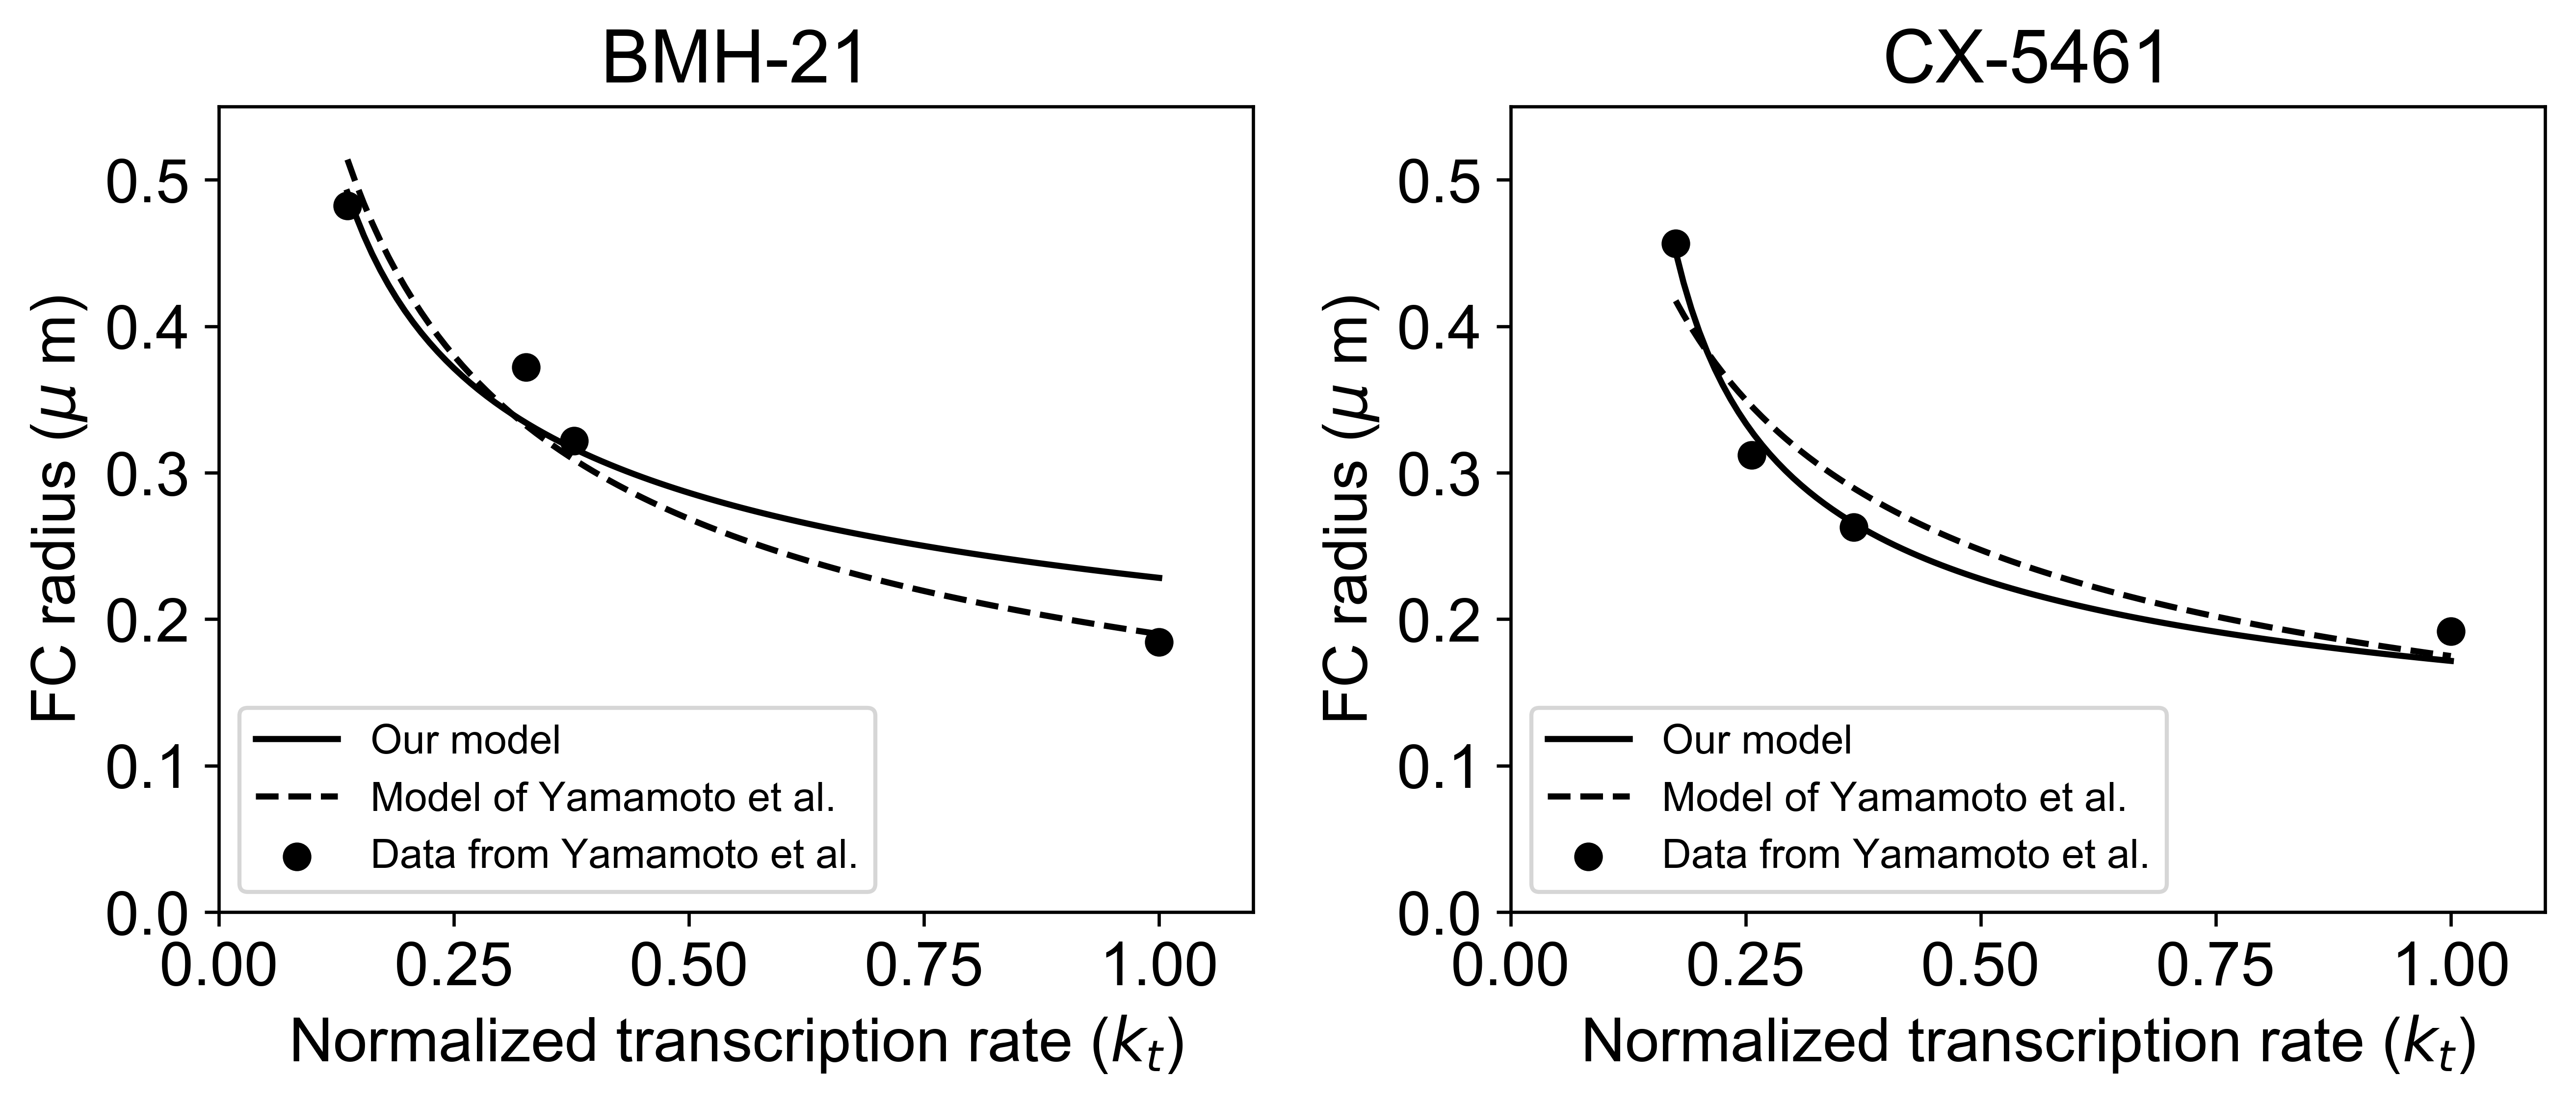

In [38]:
def prediction_rescaled(x, chi, k_p):
    return np.sqrt(chi) * x - k_p

def prediction(x, chi, k_p):
    return 1/np.sqrt(np.sqrt(chi * x) - k_p)

def prediction_yamamoto(x, a):
    return a/np.sqrt(x)

model = lmfit.Model(prediction)
model_rescaled = lmfit.Model(prediction_rescaled)
model_yamamoto = lmfit.Model(prediction_yamamoto)

##
# init 
##

# gs_kw = dict(width_ratios=[1, 0.05, 1, 0.05, 1], height_ratios=[1])
fig, axs = plt.subplots(1, 2, figsize=(9.0, 4.0), dpi=600)# layout="constrained")

#############
# BMH
#############

df = pandas.read_csv('BMH.csv')
print(df.keys())
print(df["pre-rRNA level"])
x_rescaled = df["pre-rRNA level"].copy().apply(np.sqrt)
y_rescaled = df["Area"].copy().apply(lambda x: 1/x)
fit_rescaled = model_rescaled.fit(y_rescaled, x=x_rescaled, chi=1, k_p=1)

x = df["pre-rRNA level"]
y = df["Area"].copy().apply(lambda x: x/np.pi).apply(np.sqrt)
fit = model.fit(y, x=x, chi=fit_rescaled.best_values['chi'], k_p=fit_rescaled.best_values['k_p'])
print(fit.best_values)

fit_yamamoto = model_yamamoto.fit(y, x=x, a=1)
print(fit_yamamoto.best_values)

ax = axs[0]
#ax.set_aspect(1)
ax.scatter(x,y, color="black", label='Data from Yamamoto et al.')

x_smooth = np.linspace(x[0],x[3],100)
ax.plot(x_smooth,prediction(x_smooth, fit.best_values['chi'], fit.best_values['k_p']), color="black", label=r"Our model")
print(fit.chisqr)
ax.plot(x_smooth,prediction_yamamoto(x_smooth, fit_yamamoto.best_values['a']), color="black", ls="--", label=r"Model of Yamamoto et al.")
print(fit_yamamoto.chisqr)
ax.set_ylabel(r"FC radius ($\mu$ m)", fontsize=15)
ax.set_xlabel(r"Normalized transcription rate ($k_t$)", fontsize=15)
ax.set_xlim(0,1.1)
ax.set_ylim(0,0.55)
ax.set_title("BMH-21")
ax.legend()
ax.legend(loc='lower left', fontsize=10) #, fontsize="x-small", frameon=False)

#############
# CX
#############

df = pandas.read_csv('CX.csv')
print(df.keys())
print(df["pre-rRNA level"])
x_rescaled = df["pre-rRNA level"].copy().apply(np.sqrt)
y_rescaled = df["Area"].copy().apply(lambda x: 1/x)
fit_rescaled = model_rescaled.fit(y_rescaled, x=x_rescaled, chi=1, k_p=1)

x = df["pre-rRNA level"]
y = df["Area"].copy().apply(lambda x: x/np.pi).apply(np.sqrt)
fit = model.fit(y, x=x, chi=fit_rescaled.best_values['chi'], k_p=fit_rescaled.best_values['k_p'])
print(fit.best_values)

fit_yamamoto = model_yamamoto.fit(y, x=x, a=1)
print(fit_yamamoto.best_values)

ax = axs[1]
#ax.set_aspect(1)
ax.scatter(x,y, color="black", label='Data from Yamamoto et al.')

x_smooth = np.linspace(x[0],x[3],100)
ax.plot(x_smooth,prediction(x_smooth, fit.best_values['chi'], fit.best_values['k_p']), color="black", label=r"Our model")
print(fit.chisqr)
ax.plot(x_smooth,prediction_yamamoto(x_smooth, fit_yamamoto.best_values['a']), color="black", ls="--", label=r"Model of Yamamoto et al.")
print(fit_yamamoto.chisqr)
ax.set_ylabel(r"FC radius ($\mu$ m)", fontsize=15)
ax.set_xlabel(r"Normalized transcription rate ($k_t$)", fontsize=15)
ax.set_xlim(0,1.1)
ax.set_ylim(0,0.55)
ax.set_title("CX-5461")
ax.legend()
ax.legend(loc='lower left', fontsize=10) #, fontsize="x-small", frameon=False)

fig.tight_layout()
plt.savefig('Yamamoto_comparison.svg', format='svg', dpi=600)

In [3]:
fit_yamamoto